In [4]:
# R has a set of ready datasets for us to play with
# To call these datasets, load the datasets library
library(datasets)

In [70]:
# The psych package is a very useful 3rd party tool for descriptive statistics
library(psych)

In [73]:
# car is another useful package
library(car)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:psych’:

    logit



In [10]:
# The following code allows us to browse the datasets in the library
library(help = "datasets")

In [17]:
# To check what the dataset faithful is
?faithful

In [7]:
# The following code loads the faithful dataset into our R program
data(faithful)

In [11]:
# Inspect the structure of the dataset
str(faithful)  # Shows that there are 2 variables (numerical): eruptions and waiting

'data.frame':	272 obs. of  2 variables:
 $ eruptions: num  3.6 1.8 3.33 2.28 4.53 ...
 $ waiting  : num  79 54 74 62 85 55 88 85 51 85 ...


In [12]:
# Inspect the dataset itself
faithful

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55
4.700,88
3.600,85
1.950,51
4.350,85


In [26]:
# Let's fit a linear regression
eruption_model = lm(waiting ~ eruptions, data=faithful)

In [27]:
# Show the regression results (Refer to Slide 19 for interpretation)
summary(eruption_model)  # show the regression results


Call:
lm(formula = waiting ~ eruptions, data = faithful)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0796  -4.4831   0.2122   3.9246  15.9719 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.4744     1.1549   28.98   <2e-16 ***
eruptions    10.7296     0.3148   34.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.914 on 270 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8108 
F-statistic:  1162 on 1 and 270 DF,  p-value: < 2.2e-16


In [30]:
# Let's create some simulated eruption time to predict waiting time (Slide 22)
# Create a new data frame with eruption time of 20, 40, 35, and 80
newdata = data.frame(eruptions=c(20, 40, 35, 80))

# We then use the fitted model "eruption" to predict the waiting time for each of these simulated data
predict(eruption_model, newdata)  # predict the outcome of new data

# Results show that the associated waiting times for each eruption length:
# 20 - 248
# 40 - 463
# 35 - 409
# 80 - 892

1        2        3        4 
248.0672 462.6601 409.0118 891.8457

In [32]:
# Multivariate regressions (Slide 23)
# Load the UC Berkely admittance data
ucb_data = data.frame(UCBAdmissions)

# Check what this dataset is about
?UCBAdmissions

In [36]:
# Inspect the data
ucb_data

# Note that admit, gender and department are categorical variables

Admit,Gender,Dept,Freq
Admitted,Male,A,512
Rejected,Male,A,313
Admitted,Female,A,89
Rejected,Female,A,19
Admitted,Male,B,353
Rejected,Male,B,207
Admitted,Female,B,17
Rejected,Female,B,8
Admitted,Male,C,120
Rejected,Male,C,205


In [39]:
# Check that admit, gender, dept are encoded as categorical variables (Factor)
# If not, you should convert the variables to factors using as.factor
str(ucb_data)

'data.frame':	24 obs. of  4 variables:
 $ Admit : Factor w/ 2 levels "Admitted","Rejected": 1 2 1 2 1 2 1 2 1 2 ...
 $ Gender: Factor w/ 2 levels "Male","Female": 1 1 2 2 1 1 2 2 1 1 ...
 $ Dept  : Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Freq  : num  512 313 89 19 353 207 17 8 120 205 ...


In [40]:
# Check the summary statistics for the dataset to ensure no outliers like negative frequencies
# Categorical variables are represented as categories while numerical variables have min, mean, max etc.
summary(ucb_data)

      Admit       Gender   Dept       Freq      
 Admitted:12   Male  :12   A:4   Min.   :  8.0  
 Rejected:12   Female:12   B:4   1st Qu.: 80.0  
                           C:4   Median :170.0  
                           D:4   Mean   :188.6  
                           E:4   3rd Qu.:302.5  
                           F:4   Max.   :512.0  

In [41]:
# To convert variables to integers
ucb_data["Gender"] = as.integer(ucb_data[["Gender"]])

In [42]:
# Inspect the data and observe that gender is now numerical (which is wrong for interpretation)
summary(ucb_data)

      Admit        Gender    Dept       Freq      
 Admitted:12   Min.   :1.0   A:4   Min.   :  8.0  
 Rejected:12   1st Qu.:1.0   B:4   1st Qu.: 80.0  
               Median :1.5   C:4   Median :170.0  
               Mean   :1.5   D:4   Mean   :188.6  
               3rd Qu.:2.0   E:4   3rd Qu.:302.5  
               Max.   :2.0   F:4   Max.   :512.0  

In [44]:
# To convert numerical variables back to categorical
ucb_data["Gender"] = as.factor(ucb_data[["Gender"]])

In [45]:
# Check the data again to ensure that we have correctly converted gender
summary(ucb_data)

      Admit    Gender Dept       Freq      
 Admitted:12   1:12   A:4   Min.   :  8.0  
 Rejected:12   2:12   B:4   1st Qu.: 80.0  
                      C:4   Median :170.0  
                      D:4   Mean   :188.6  
                      E:4   3rd Qu.:302.5  
                      F:4   Max.   :512.0  

In [46]:
# R handles categorical/numerical variables automatically
# We don't need to re-format the data into what was represented in Slide 25 and 26
# In R, we just need to make sure that variables are correctly formatted as numerical or categorical

In [86]:
# Let's load another dataset (seatbelts)
sb_data = data.frame(Seatbelts)

In [54]:
# Descriptive statistics - exploratory
# 1. investigate the structure of the dataset
# make sure that your variables are of the correct data types
str(sb_data)  

'data.frame':	192 obs. of  8 variables:
 $ DriversKilled: num  107 97 102 87 119 106 110 106 107 134 ...
 $ drivers      : num  1687 1508 1507 1385 1632 ...
 $ front        : num  867 825 806 814 991 ...
 $ rear         : num  269 265 319 407 454 427 522 536 405 437 ...
 $ kms          : num  9059 7685 9963 10955 11823 ...
 $ PetrolPrice  : num  0.103 0.102 0.102 0.101 0.101 ...
 $ VanKilled    : num  12 6 12 8 10 13 11 6 10 16 ...
 $ law          : num  0 0 0 0 0 0 0 0 0 0 ...


In [57]:
# check the top few and bottom few rows
head(sb_data)  # show first 6 rows
tail(sb_data)  # show the last 6 rows

head(sb_data, n=20)  # show th first n rows

DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
107,1687,867,269,9059,0.1029718,12,0
97,1508,825,265,7685,0.1023630,6,0
102,1507,806,319,9963,0.1020625,12,0
87,1385,814,407,10955,0.1008733,8,0
119,1632,991,454,11823,0.1010197,10,0
106,1511,945,427,12391,0.1005812,13,0


,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
187,79,1222,601,472,21486,0.1149360,7,1
188,96,1284,644,521,21626,0.1147970,5,1
189,122,1444,643,429,20195,0.1140932,7,1
190,120,1575,641,408,19928,0.1164655,7,1
191,137,1737,711,490,18564,0.1160261,4,1
192,154,1763,721,491,18149,0.1160667,7,1


DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
107,1687,867,269,9059,0.10297181,12,0
97,1508,825,265,7685,0.10236300,6,0
102,1507,806,319,9963,0.10206249,12,0
87,1385,814,407,10955,0.10087330,8,0
119,1632,991,454,11823,0.10101967,10,0
106,1511,945,427,12391,0.10058119,13,0
110,1559,1004,522,13460,0.10377398,11,0
106,1630,1091,536,14055,0.10407640,6,0
107,1579,958,405,12106,0.10377398,10,0
134,1653,850,437,11372,0.10302640,16,0


In [58]:
# subsetting/slicing data
sb_data[45:50,1:3]  # sb_data[row:row, column:column]

,DriversKilled,drivers,front
45,117,1778,939
46,170,1976,1074
47,168,2397,1089
48,198,2654,1208
49,144,2097,903
50,146,1963,916


In [62]:
# Use a groupby analysis from the psych package
# This code groups all the variables by the variable law (0: before, 1: after)
describeBy(sb_data, group=sb_data$law)


 Descriptive statistics by group 
group: 0
              vars   n     mean      sd  median  trimmed     mad     min
DriversKilled    1 169   125.87   24.26   121.0   124.10   22.24   79.00
drivers          2 169  1717.75  266.89  1653.0  1695.37  257.97 1309.00
front            3 169   873.46  151.54   860.0   869.22  155.67  567.00
rear             4 169   400.32   84.88   401.0   397.28   81.54  224.00
kms              5 169 14463.30 2663.17 14455.0 14475.13 3128.29 7685.00
PetrolPrice      6 169     0.10    0.01     0.1     0.10    0.01    0.08
VanKilled        7 169     9.59    3.50    10.0     9.58    4.45    2.00
law              8 169     0.00    0.00     0.0     0.00    0.00    0.00
                   max    range  skew kurtosis     se
DriversKilled   198.00   119.00  0.66    -0.13   1.87
drivers        2654.00  1345.00  0.78     0.05  20.53
front          1299.00   732.00  0.30    -0.49  11.66
rear            646.00   422.00  0.38     0.15   6.53
kms           21040.00 13355.

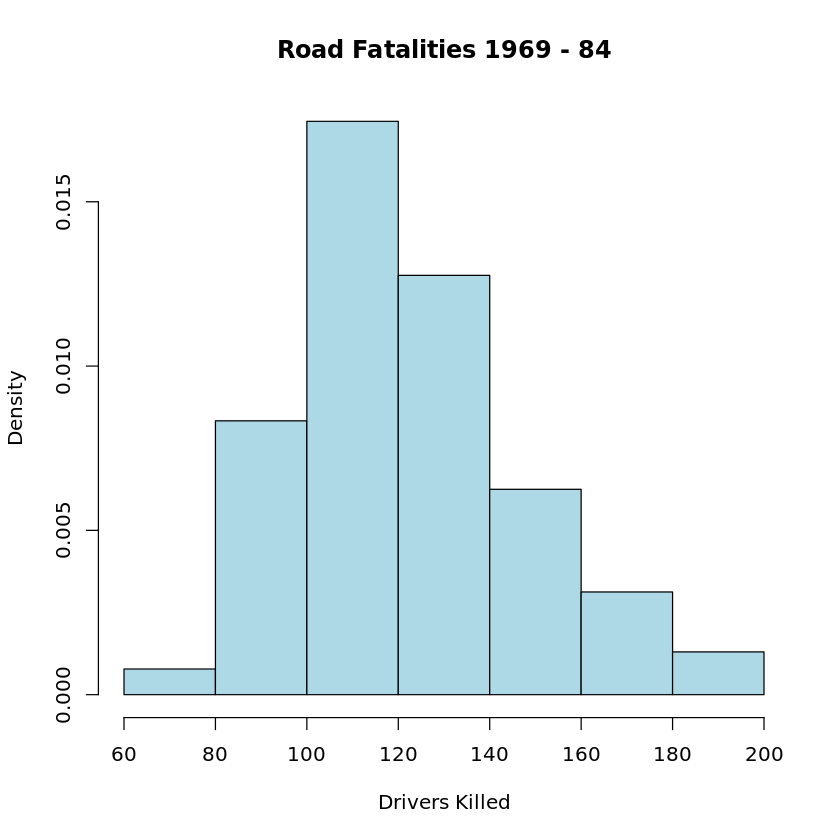

In [63]:
# Use histogram plots to visualize the data
hist(sb_data$DriversKilled, main="Road Fatalities 1969 - 84",
     xlab="Drivers Killed", ylab="Density", freq=FALSE, col="light blue")

In [64]:
# we want to know how different the 2 groups are (before and after)
# law was implemented
# use a student's t-test (difference between 2 means)
# need to consider: whether the variances of both samples are the same

# subset the data into 2 groups first
drivers_killed_b4 = sb_data[sb_data$law == 0, 'DriversKilled']
drivers_killed_after = sb_data[sb_data$law == 1, 'DriversKilled']

In [65]:
# test if sample variances are homogenous (similar)
var.test(drivers_killed_b4, drivers_killed_after)  # p-value greater than 0.05 indicates homogeneity
t.test(drivers_killed_b4, drivers_killed_after, var.equal=TRUE, paired=FALSE)
# p-value < 0.01, reject null, imply significant difference in means
# This implies that there is significant drop in driver deaths after the law was passed.


	F test to compare two variances

data:  drivers_killed_b4 and drivers_killed_after
F = 1.1912, num df = 168, denom df = 22, p-value = 0.6535
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5794668 2.0916430
sample estimates:
ratio of variances 
          1.191211 



	Two Sample t-test

data:  drivers_killed_b4 and drivers_killed_after
t = 4.7942, df = 190, p-value = 3.288e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15.07239 36.14552
sample estimates:
mean of x mean of y 
 125.8698  100.2609 


In [67]:
# sanity check: what is the variances are not the same - use the Welch-Satterthwaite test
t.test(drivers_killed_b4, drivers_killed_after, var.equal=FALSE, paired=FALSE)
# We get the same implication from the results


	Welch Two Sample t-test

data:  drivers_killed_b4 and drivers_killed_after
t = 5.1253, df = 29.609, p-value = 1.693e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15.39892 35.81899
sample estimates:
mean of x mean of y 
 125.8698  100.2609 


DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
107,1687,867,269,9059,0.1029718,12,0
97,1508,825,265,7685,0.1023630,6,0
102,1507,806,319,9963,0.1020625,12,0
87,1385,814,407,10955,0.1008733,8,0
119,1632,991,454,11823,0.1010197,10,0
106,1511,945,427,12391,0.1005812,13,0


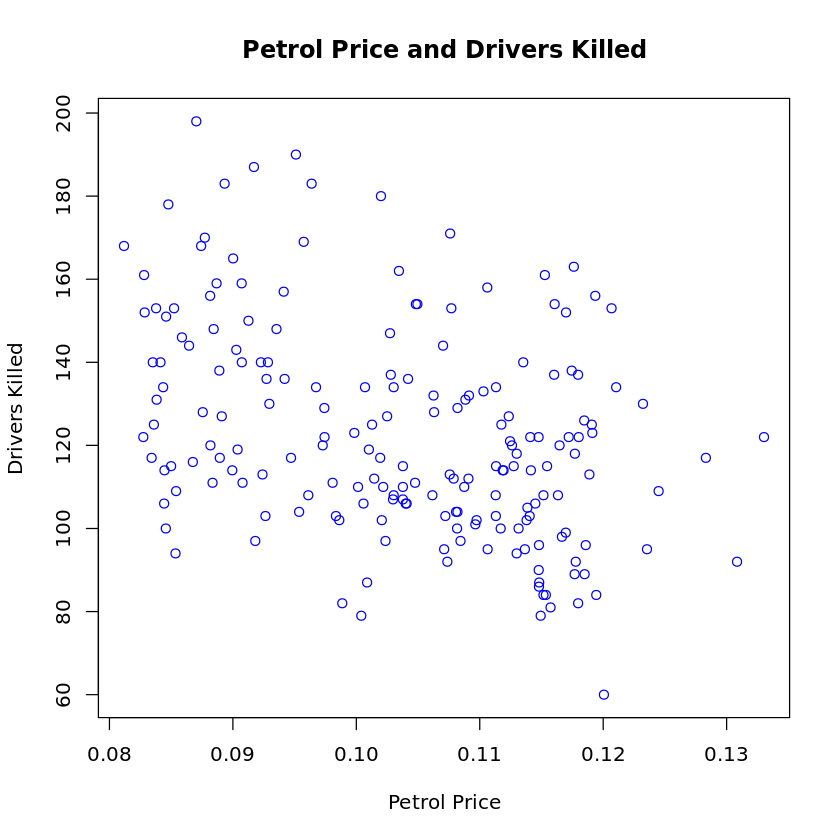

In [68]:
# Use scatterplots to check relationship
# Scatterplots
head(sb_data)
plot(sb_data$PetrolPrice, sb_data$DriversKilled, main="Petrol Price and Drivers Killed",
     xlab="Petrol Price", ylab="Drivers Killed", col='blue')

# Seems that there is some kind of weak relationship (data is very dispersed) 
# that the cheaper the petrol price, the more drivers killed
# Makes sense since that people tend to drive more when petrol prices are cheap
# But since driving is quite inelastic, the relationship is not that strong

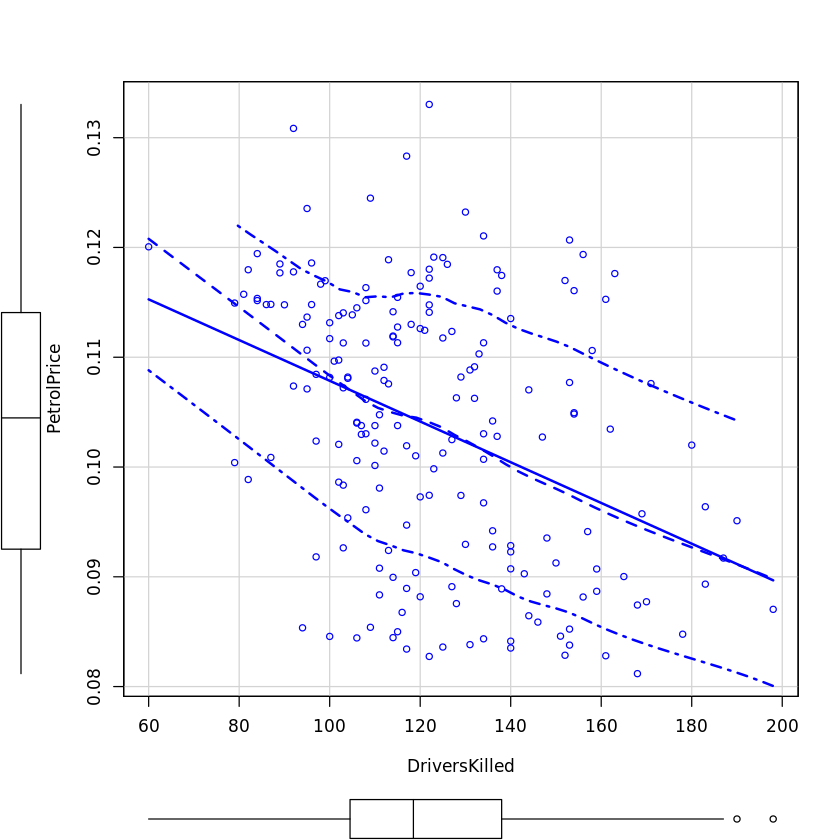

In [77]:
# Using the scatterplot function from package CAR
scatterplot(PetrolPrice ~ DriversKilled, data=sb_data)

In [89]:
# linear regression
model = lm(DriversKilled ~ front + rear + kms + PetrolPrice + law, data=sb_data)

In [90]:
summary(model)
# What does the results show? What doesn't make sense?
# Scatterplot shows that petrolprice has some relationship,
# however the linear regression, after accounting for other explanatory variables
# says that petrolprice does not have a statistically significant relationship


Call:
lm(formula = DriversKilled ~ front + rear + kms + PetrolPrice + 
    law, data = sb_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.667 -11.953  -0.991  13.451  38.857 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.091e+00  2.133e+01   0.426 0.670490    
front        1.662e-01  1.955e-02   8.501    6e-15 ***
rear        -1.157e-01  3.451e-02  -3.353 0.000967 ***
kms          5.083e-04  7.045e-04   0.722 0.471455    
PetrolPrice  1.039e+02  1.286e+02   0.808 0.420396    
law          2.176e+01  5.785e+00   3.762 0.000226 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.32 on 186 degrees of freedom
Multiple R-squared:  0.5467,	Adjusted R-squared:  0.5345 
F-statistic: 44.86 on 5 and 186 DF,  p-value: < 2.2e-16


In [55]:
# Try your own exercise!
titanic = data.frame(Titanic)